In [23]:
import pandas as pd
from dbconnection import create_database_connection, read_data_into_dataframe
from plottingFunction import plot_histogram



In [24]:
engine = create_database_connection()
df=read_data_into_dataframe(engine, "xdr_data")
#rawdf.head(5)
print(df.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

Display information about the DataFrame

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300002 entries, 0 to 300001
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 298020 non-null  float64
 1   Start                                     300000 non-null  object 
 2   Start ms                                  300000 non-null  float64
 3   End                                       300000 non-null  object 
 4   End ms                                    300000 non-null  float64
 5   Dur. (ms)                                 300000 non-null  float64
 6   IMSI                                      298862 non-null  float64
 7   MSISDN/Number                             297870 non-null  float64
 8   IMEI                                      298858 non-null  float64
 9   Last Location Name                        297696 non-null  object 
 10  Avg RTT DL (ms)     

Missing values

In [26]:
df.isnull().sum()

Bearer Id                                     1982
Start                                            2
Start ms                                         2
End                                              2
End ms                                           2
Dur. (ms)                                        2
IMSI                                          1140
MSISDN/Number                                 2132
IMEI                                          1144
Last Location Name                            2306
Avg RTT DL (ms)                              55658
Avg RTT UL (ms)                              55624
Avg Bearer TP DL (kbps)                          2
Avg Bearer TP UL (kbps)                          2
TCP DL Retrans. Vol (Bytes)                 176292
TCP UL Retrans. Vol (Bytes)                 193298
DL TP < 50 Kbps (%)                           1508
50 Kbps < DL TP < 250 Kbps (%)                1508
250 Kbps < DL TP < 1 Mbps (%)                 1508
DL TP > 1 Mbps (%)             

Data frame Summary statistics

In [27]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,2.980200e+05,300000.000000,300000.000000,3.000000e+05,2.988620e+05,2.978700e+05,2.988580e+05,244344.000000,244378.000000,300000.000000,...,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000000e+05,3.000000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893168e+18,288.611353,288.097173,8.103749e+04,2.148805e+10,2.447439e+12,2.241633e+13,619.781471,84.793351,23971.838588,...,6.710558e+06,6.345413e+06,6.725207e+06,6.359479e+06,2.439671e+08,4.782692e+06,2.432046e+08,4.768996e+06,1.127637e+07,2.441425e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [28]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().mean() * 100).round(2)

# Display the result
print("Percentage of missing values for each column:")
print(missing_percentage)


Percentage of missing values for each column:
Bearer Id                                    0.66
Start                                        0.00
Start ms                                     0.00
End                                          0.00
End ms                                       0.00
Dur. (ms)                                    0.00
IMSI                                         0.38
MSISDN/Number                                0.71
IMEI                                         0.38
Last Location Name                           0.77
Avg RTT DL (ms)                             18.55
Avg RTT UL (ms)                             18.54
Avg Bearer TP DL (kbps)                      0.00
Avg Bearer TP UL (kbps)                      0.00
TCP DL Retrans. Vol (Bytes)                 58.76
TCP UL Retrans. Vol (Bytes)                 64.43
DL TP < 50 Kbps (%)                          0.50
50 Kbps < DL TP < 250 Kbps (%)               0.50
250 Kbps < DL TP < 1 Mbps (%)                0.50
DL T

Cleaning the data frame

In [29]:
# df_cleaned = clean_data_based_on_types(df, drop_threshold=0.9, fill_method='mean')
# missing_percentage = (df_cleaned.isnull().mean() * 100).round(2)
# print(df_cleaned.head())

Display the top 10 handsets

In [30]:
top_10_handsets = df['Handset Type'].value_counts().head(10).reset_index()
top_10_handsets.columns = ['handset_model', 'total_count']
print(top_10_handsets)

                  handset_model  total_count
0              Huawei B528S-23A        39504
1       Apple iPhone 6S (A1688)        18838
2        Apple iPhone 6 (A1586)        18046
3                     undefined        17974
4        Apple iPhone 7 (A1778)        12652
5       Apple iPhone Se (A1723)        10374
6        Apple iPhone 8 (A1905)         9986
7       Apple iPhone Xr (A2105)         9136
8  Samsung Galaxy S8 (Sm-G950F)         9040
9        Apple iPhone X (A1901)         7626


Top 3 handset manufacturers

In [31]:
top_3_Manufacturer = df['Handset Manufacturer'].value_counts().head(3).reset_index()
top_3_Manufacturer.columns = ['Handset Manufacturer', 'total_count']
print(top_3_Manufacturer)

  Handset Manufacturer  total_count
0                Apple       119130
1              Samsung        81678
2               Huawei        68846


Identify the top 5 handsets per top 3 handset manufacturer

In [32]:

# Extract manufacturer information from the 'handset_model' column
df['Handset Manufacturer'] = df['Handset Type'].str.split('_').str[0]

# Get the top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

# Create an empty DataFrame to store the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = pd.DataFrame(columns=['Handset Manufacturer', 'total_count'])

# Iterate through the top manufacturers and find the top 5 handsets for each
for manufacturer in top_manufacturers:
    # Filter the DataFrame for the current manufacturer
    manufacturer_df = df[df['Handset Manufacturer'] == manufacturer]
    
    # Get the top 5 handsets for the current manufacturer
    top_handsets = manufacturer_df['Handset Manufacturer'].value_counts().head(5).reset_index()
    top_handsets.columns = ['Handset Type', 'total_count']
    top_handsets['Handset Manufacturer'] = manufacturer
    
    # Append the result to the main DataFrame
    top_handsets_per_manufacturer = pd.concat([top_handsets_per_manufacturer, top_handsets])

# Display the top 5 handsets for each of the top 3 manufacturers
print(top_handsets_per_manufacturer)


      Handset Manufacturer total_count             Handset Type
0         Huawei B528S-23A       39504         Huawei B528S-23A
0  Apple iPhone 6S (A1688)       18838  Apple iPhone 6S (A1688)
0   Apple iPhone 6 (A1586)       18046   Apple iPhone 6 (A1586)


In [33]:
import pandas as pd

# Assuming df is your DataFrame with a column 'handset_model'
# Extract manufacturer information from the 'handset_model' column
#df['Handset Manufacturer'] = df['Handset Manufacturer'].str.split('_').str[0]

# Get the top 3 handset manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index

# Filter the DataFrame for the top 3 manufacturers
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers)]

# Get the top 5 handsets for each manufacturer
top_handsets_per_manufacturer = (
    filtered_df.groupby(['Handset Manufacturer', 'Handset Type'])
               .size()
               .reset_index(name='total_count')
               .sort_values(by='total_count', ascending=False)
               .groupby('Handset Manufacturer')
               .head(5)
)

# Display the top 5 handsets for each of the top 3 manufacturers
print(top_handsets_per_manufacturer)


      Handset Manufacturer             Handset Type  total_count
2         Huawei B528S-23A         Huawei B528S-23A        39504
1  Apple iPhone 6S (A1688)  Apple iPhone 6S (A1688)        18838
0   Apple iPhone 6 (A1586)   Apple iPhone 6 (A1586)        18046


Aggregate per user

Overview of the users’ behaviour on applications

In [35]:
from dataProcessing import convert_to_datetime, calculate_session_duration, aggregate_per_user

all_applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

# Apply data processing functions
df = convert_to_datetime(df)
df = calculate_session_duration(df)
user_aggregated = aggregate_per_user(df, all_applications)

# Display the aggregated information
user_aggregated.head(10)


,Number of xDR sessions,Session Duration (s),Total Download (Bytes),Total Upload (Bytes),Social Media (Total Bytes),Google (Total Bytes),Email (Total Bytes),Youtube (Total Bytes),Netflix (Total Bytes),Gaming (Total Bytes),Other (Total Bytes)
MSISDN/Number,,,,,,,,,,,
3.360100e+10,2,233520.0,1.685275e+09,72106216.0,4464270.0,8778010.0,2662724.0,43249096.0,54361962.0,1.624917e+09,7.731417e+08
3.360100e+10,2,362520.0,2.415104e+08,72208918.0,5321130.0,10669726.0,6615562.0,24864446.0,22443526.0,2.395002e+08,5.634201e+08
3.360100e+10,2,270000.0,1.113319e+09,78613640.0,6391246.0,6886252.0,6410760.0,42667140.0,38707800.0,1.077655e+09,1.003387e+09
3.360101e+10,2,99840.0,8.039863e+08,40655052.0,560588.0,19356986.0,4569340.0,13954642.0,3884184.0,7.822523e+08,7.055940e+07
3.360101e+10,4,74400.0,2.726261e+09,188561054.0,5825084.0,36999232.0,6610938.0,83066004.0,98403448.0,2.629596e+09,1.609609e+09
3.360101e+10,4,507960.0,1.110416e+09,120018498.0,7585824.0,30526268.0,15697192.0,68694244.0,60631002.0,1.023272e+09,9.847456e+08
3.360101e+10,4,256800.0,1.106082e+09,203363716.0,5539254.0,20392806.0,2717918.0,52862670.0,91624794.0,1.096922e+09,4.497774e+08
3.360101e+10,2,172800.0,5.881702e+08,77150558.0,3565384.0,24047228.0,4431126.0,37785480.0,30585680.0,5.647288e+08,3.564031e+08
3.360101e+10,4,991320.0,1.793120e+09,187144032.0,10577370.0,28268422.0,9199650.0,126887604.0,108432234.0,1.666176e+09,2.083766e+09


data cleaning

In [36]:
df_not_num = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(df_not_num, axis=1)

cleaned_data = df_numeric.fillna(df_numeric.mean())

In [37]:
cleaned_data.isnull().sum()

Bearer Id                                   0
Start ms                                    0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                   

EDA

In [38]:
# Analyze the basic metrics (mean, median, etc) in the Dataset (explain) & their importance for the global objective.
columns_numeric = [
    "Dur. (ms)",
    "Avg Bearer TP DL (kbps)",
    "Avg Bearer TP UL (kbps)",
    "Social Media DL (Bytes)",
    "Social Media UL (Bytes)",
    "Google DL (Bytes)",
    "Google UL (Bytes)",
    "Email DL (Bytes)",
    "Email UL (Bytes)",
    "Youtube DL (Bytes)",
    "Youtube UL (Bytes)",
    "Netflix DL (Bytes)",
    "Netflix UL (Bytes)",
    "Gaming DL (Bytes)",
    "Gaming UL (Bytes)",
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Other DL (Bytes)",
    "Other UL (Bytes)"
]

# Create a new DataFrame with selected columns
data_new = cleaned_data[columns_numeric]

# Display the new DataFrame
data_new.describe()


,Dur. (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Total UL (Bytes),Total DL (Bytes),Other DL (Bytes),Other UL (Bytes)
count,3.000020e+05,300002.000000,300002.000000,3.000020e+05,300002.000000,3.000020e+05,3.000020e+05,3.000020e+05,300002.000000,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05
mean,1.046086e+05,13300.045927,1770.428647,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.112121e+07,4.546434e+08,4.211005e+08,8.264799e+06
std,8.103722e+04,23971.758682,4625.332374,1.035481e+06,19006.146579,3.309092e+06,1.189915e+06,1.035838e+06,269968.857083,6.710558e+06,6.345413e+06,6.725207e+06,6.359479e+06,2.439671e+08,4.782692e+06,1.127633e+07,2.441417e+08,2.432046e+08,4.768996e+06
min,7.142000e+03,0.000000,0.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,2.866892e+06,7.114041e+06,3.290000e+03,1.480000e+02
25%,5.744200e+04,43.000000,47.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,3.322203e+07,2.431072e+08,2.101869e+08,4.145943e+06
50%,8.639900e+04,63.000000,63.000000,1.794369e+06,32920.000000,5.765829e+06,2.054573e+06,1.793505e+06,466250.000000,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.114324e+07,4.558409e+08,4.218030e+08,8.267071e+06
75%,1.324300e+05,19710.000000,1120.000000,2.694938e+06,49334.000000,8.623552e+06,3.088454e+06,2.689327e+06,700440.000000,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,4.903424e+07,6.657051e+08,6.316918e+08,1.238415e+07
max,1.859336e+06,378160.000000,58613.000000,3.586064e+06,65870.000000,1.146283e+07,4.121357e+06,3.586146e+06,936418.000000,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,7.833131e+07,9.029696e+08,8.434425e+08,1.655882e+07


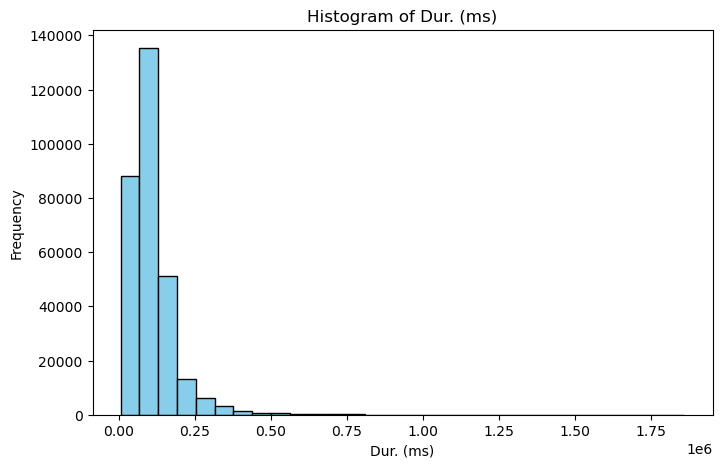

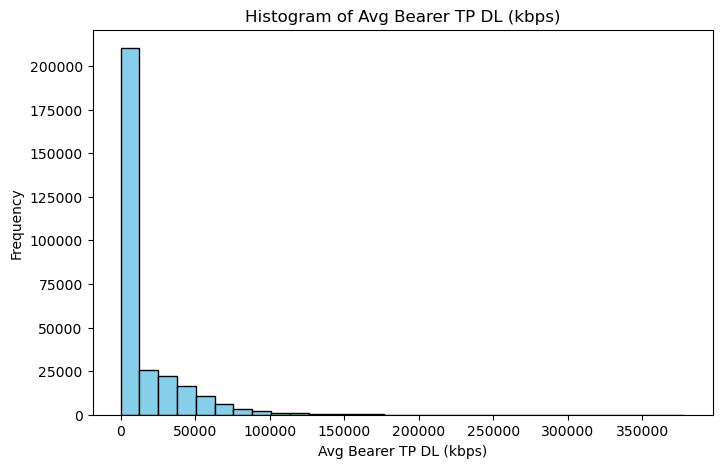

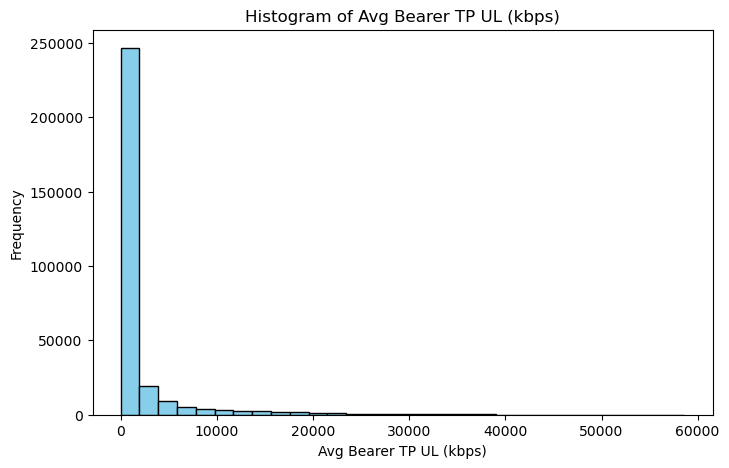

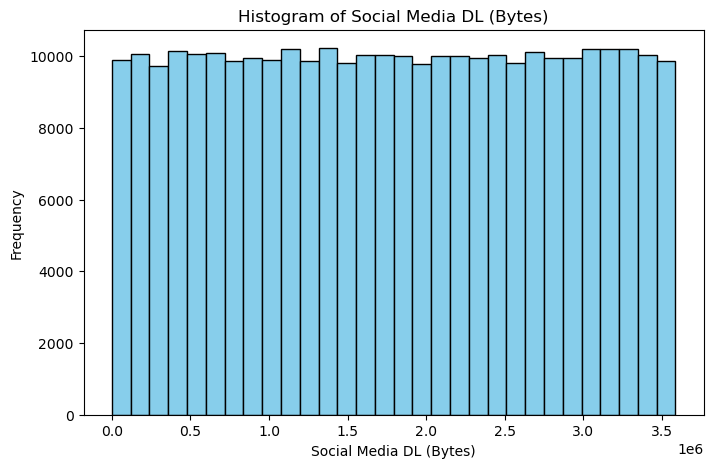

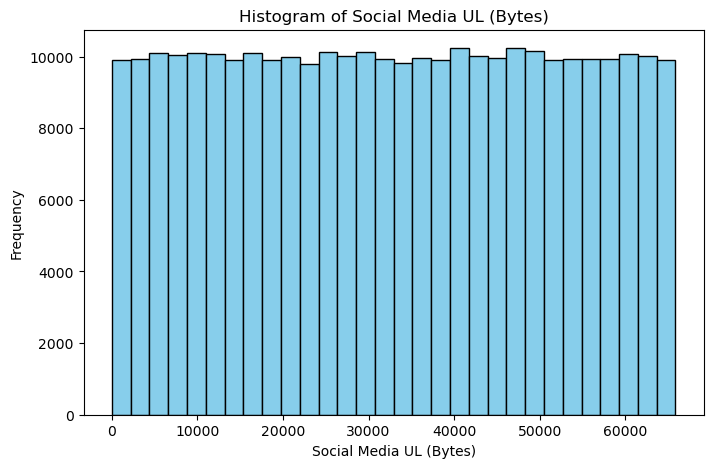

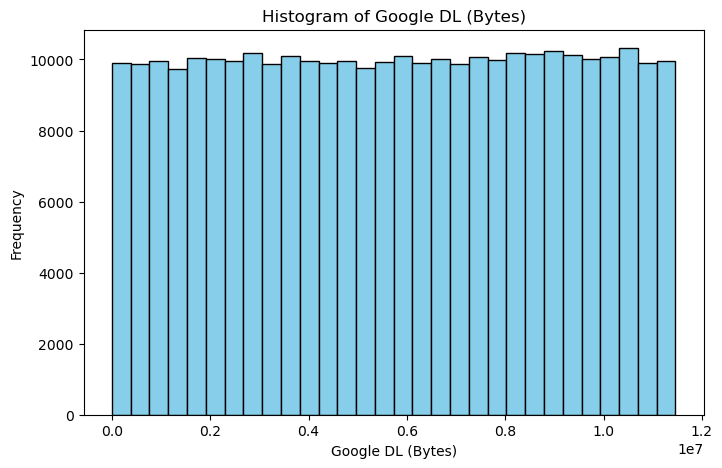

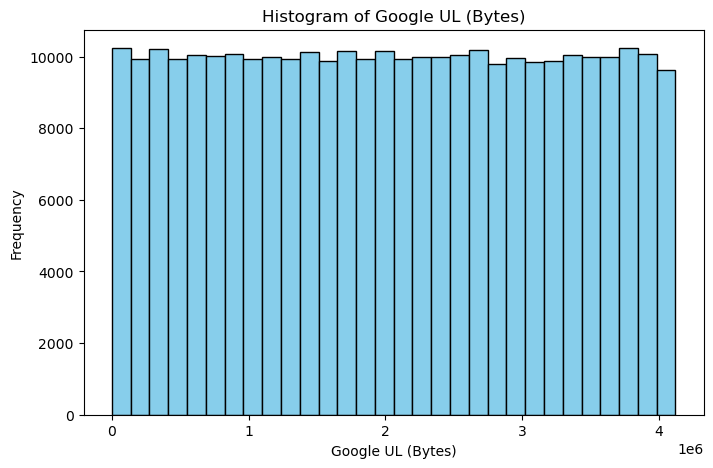

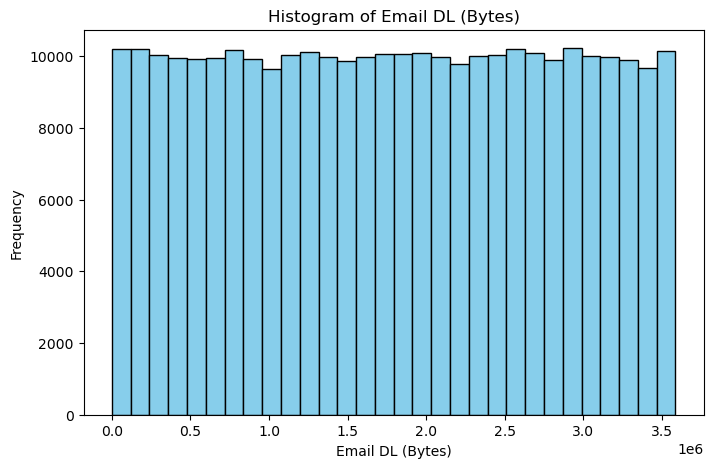

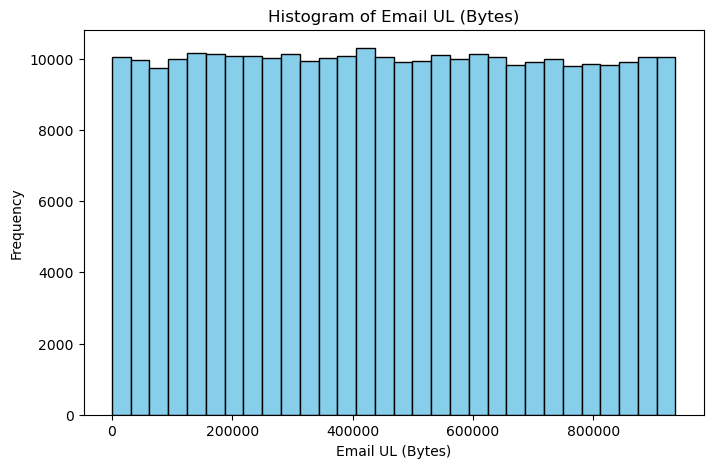

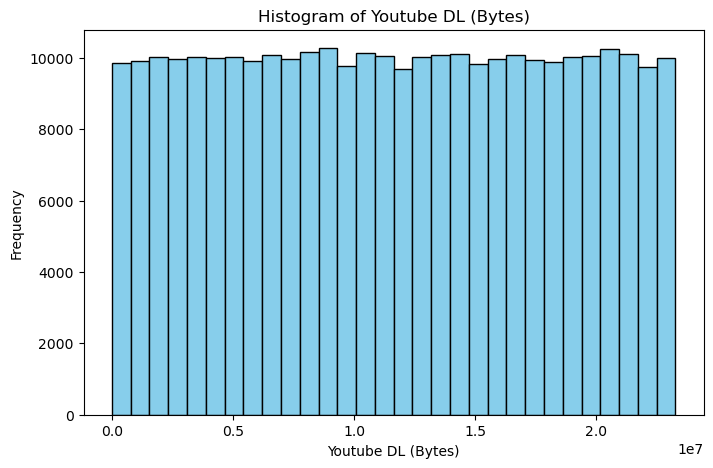

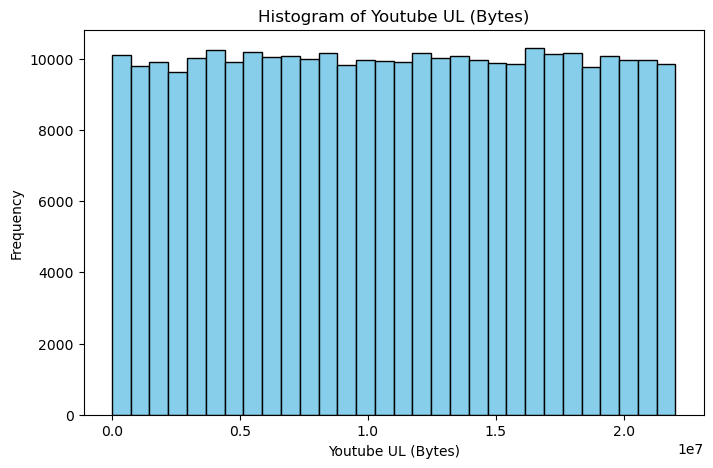

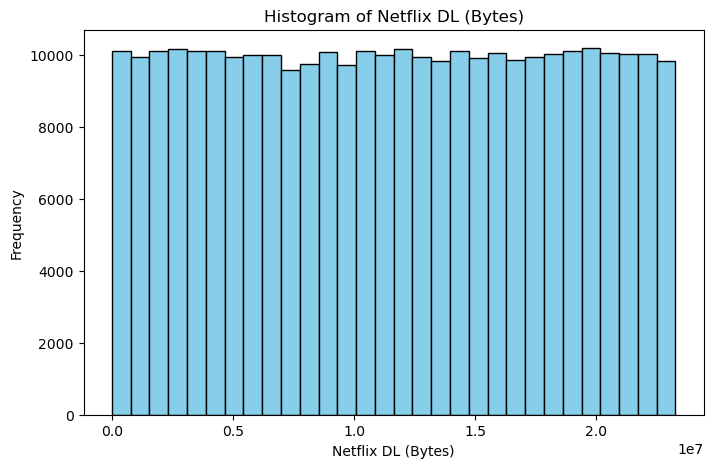

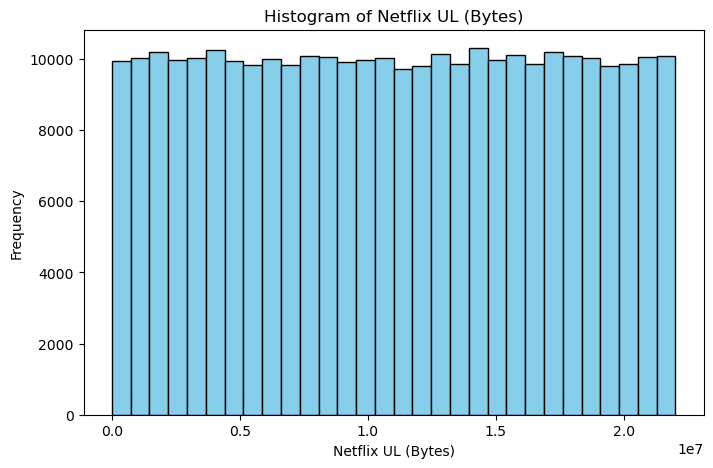

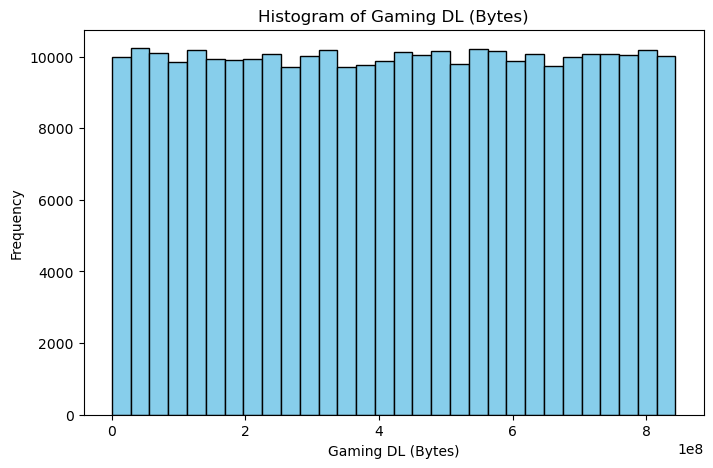

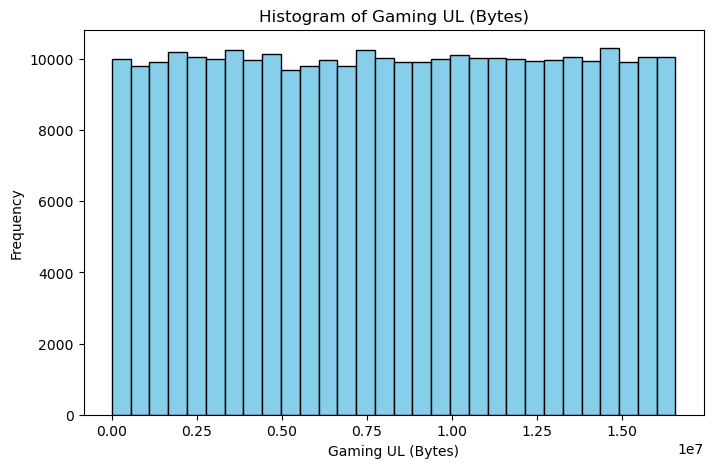

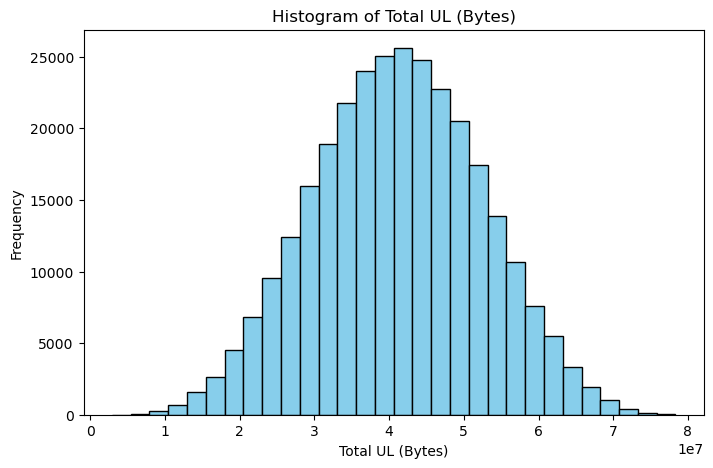

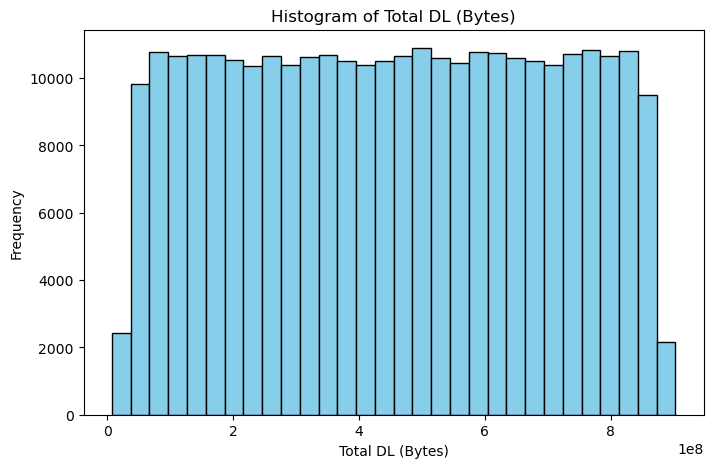

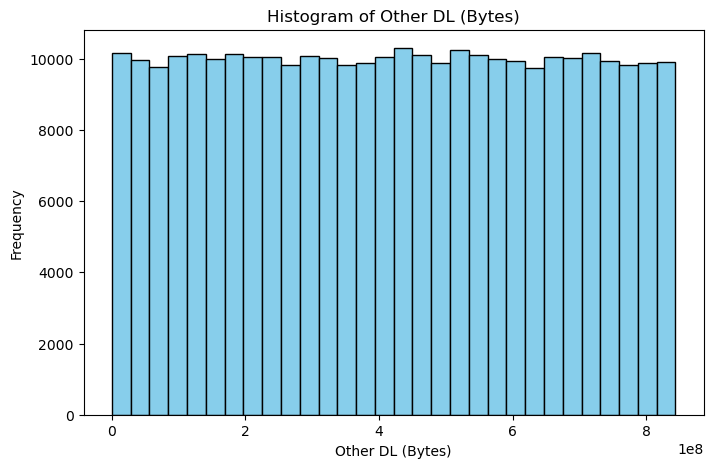

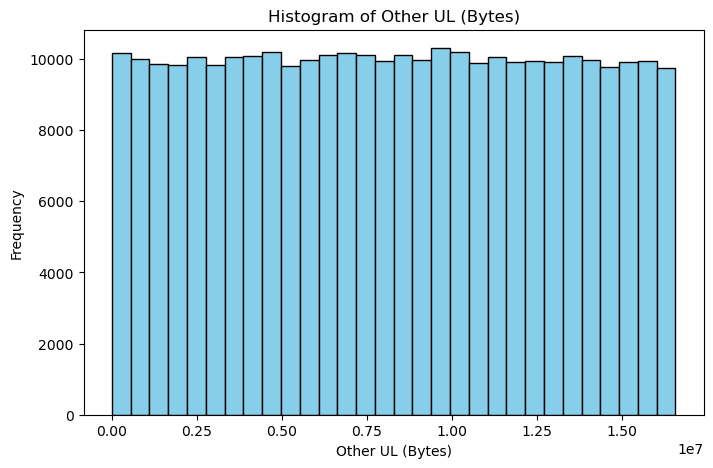

In [41]:
numeric_columns = data_new

for column in numeric_columns:
    plot_histogram(df, column)